# Archibald Prize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

archies = pd.read_csv('data/archies.csv')
archies.head()

YEAR          WINNER GENDER     DOB     DOD            PORTRAIT TITLE  \
0  1921     W B McInnes   Male  1889.0  1939.0           Desbrowe Annear   
1  1922     W B McInnes   Male  1889.0  1939.0  Professor Harrison Moore   
2  1923     W B McInnes   Male  1889.0  1939.0        Portrait of a lady   
3  1924     W B McInnes   Male  1889.0  1939.0              Miss Collins   
4  1925  John Longstaff   Male  1861.0  1941.0        Maurice Moscovitch   

  PORTRAIT GENDER                          PORTRAIT OCC (Copy/Paste)  \
0            Male                                                NaN   
1            Male  constitutional lawyer and dean of the law facu...   
2          Female                              artist Violet McInnes   
3          Female  daughter of Joseph Thomas Collins, a lawyer an...   
4            Male                                 Russian-born actor   

   OCC. CATEGORY (1) OCC. CATEGORY (2)  \
0          Architect         Architect   
1  Lawyer / Academic            Lawyer   
2             Artist            Artist   
3           Daughter            Person   
4              Actor             Actor   

                                            ANZSCO_1       ANZSCO_2  
0  Design, Engineering, Science and Transport Pro...  Professionals  
1            Legal, Social and Welfare Professionals  Professionals  
2                       Arts and Media Professionals  Professionals  
3                                                NaN            NaN  
4                       Arts and Media Professionals  Professionals

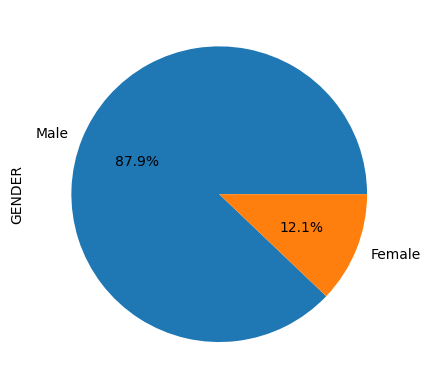

In [3]:
archies['GENDER'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

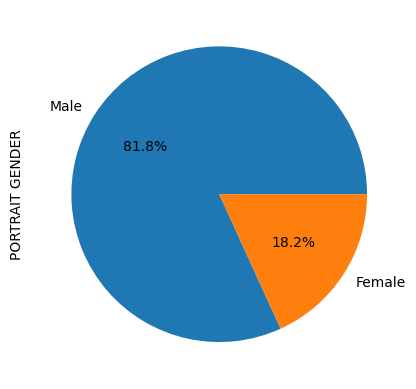

In [4]:
archies['PORTRAIT GENDER'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

<AxesSubplot: xlabel='GENDER'>

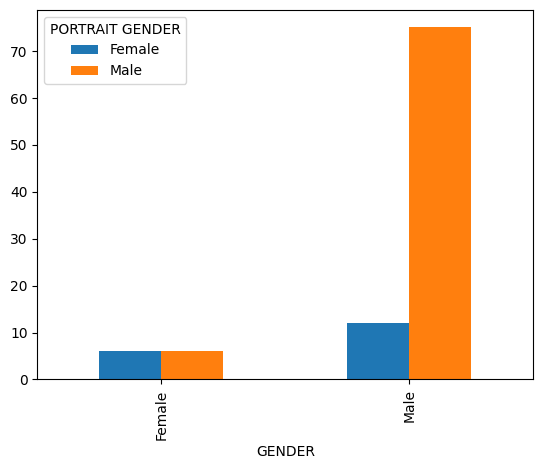

In [5]:
pd.crosstab(archies['GENDER'], archies['PORTRAIT GENDER'])\
.plot(kind='bar')

             count       mean        std   min   25%   50%   75%   max
winning_age   99.0  46.484848  11.358143  27.0  38.0  44.0  52.0  77.0 



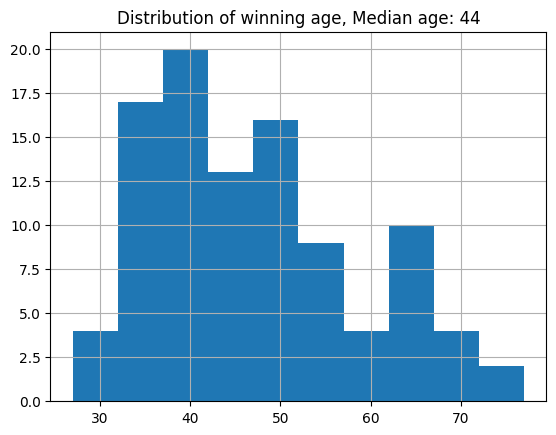

In [10]:
archies['winning_age'] = archies['YEAR'] - archies['DOB']
print(pd.DataFrame(archies.winning_age.describe()).T,'\n')
archies['winning_age'].hist()
plt.title('Distribution of winning age, Median age: 44')
plt.show()

#### Colour and Brightness

In [ ]:
from IPython.display import Image
Image(filename='images/colorbydecade_python.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1920_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1930_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1940_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1950_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1960_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1970_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1980_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/1990_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/2000_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/2010_byYear.png')

In [ ]:
from IPython.display import Image
Image(filename='images/2020_byYear.png')

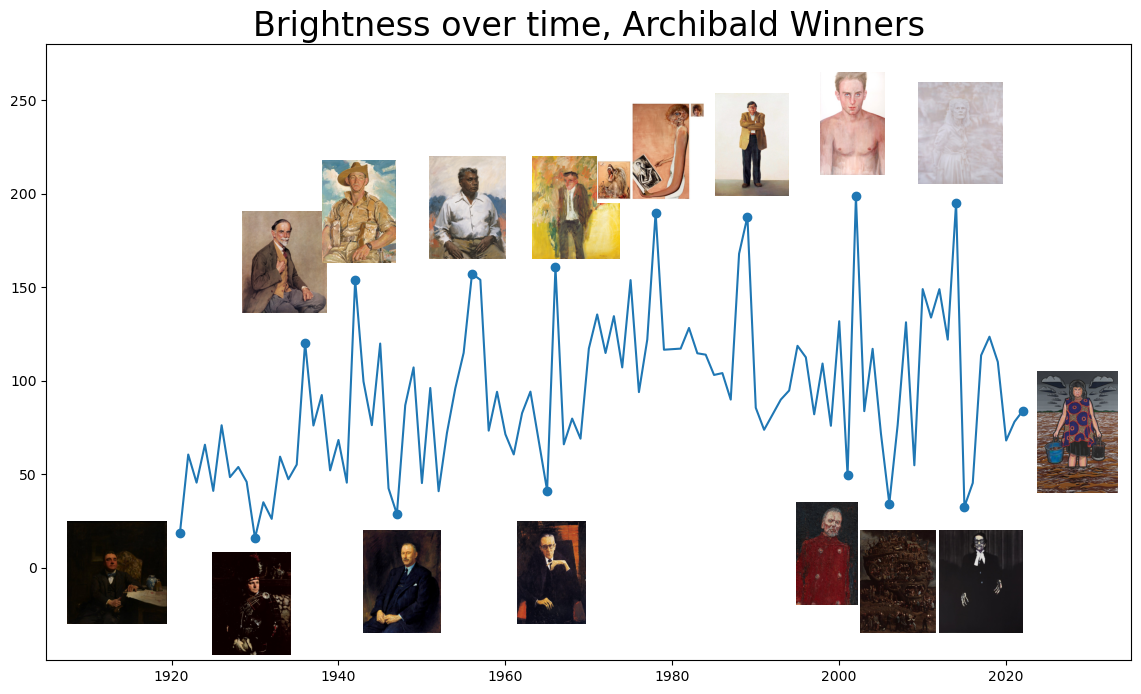

In [25]:
from IPython.display import Image
Image(filename='images/Brightness_python.png')

In [2]:
import warnings
warnings.filterwarnings("ignore")
participants_by_name = pd.read_csv('data/allparticipants_byyear.csv', index_col=0)

artist_df = pd.DataFrame()

for winner in archies.sort_values('winning_age')['WINNER'].unique():
    if (winner == '–') | (pd.isnull(winner)): continue

    artist_dict = dict()
    w_df = archies[archies['WINNER'] == winner]
    p_df = participants_by_name[participants_by_name['1'] == winner]
    
    dob,dod = w_df['DOB'].values[0],w_df['DOD'].values[0]
    artist_dict[0] = 0 #dob
    
    if pd.isnull(dod): dod = 2023
    
    for yr in range(int(dob)+1,int(dod)):
        if len(w_df[w_df['YEAR'] == yr]): artist_dict[yr-dob] = 3
        elif len(p_df[p_df['Year'] == yr]): artist_dict[yr-dob] = 2
        else: artist_dict[yr-dob] = 1
    
    if (artist_dict[yr-dob] == 1) & (dod != 2023): artist_dict[dod-dob] = 0 #dod
    
    # if winner == 'Peter Wegner': break
    
    artist_dict_df = pd.DataFrame(artist_dict.values(), columns=[winner]).T
    artist_df = artist_df.append(artist_dict_df)

    # artist_df.to_csv('archies_participants_wide.csv')

artist_stats = []

for x in range(artist_df.shape[0]):
    aa = artist_df.iloc[x:x+1].T
    first = aa[aa[aa.columns[0]] > 1][aa.columns[0]].head(1).index[0]
    last = aa[aa[aa.columns[0]] > 1][aa.columns[0]].tail(1).index[0]
    
    artist_stats.append([aa.columns[0], first, last])
    
artist_stats = pd.DataFrame(artist_stats)
artist_stats['diff'] = artist_stats[2] - artist_stats[1]

KeyError: 'winning_age'

#### Participation over time

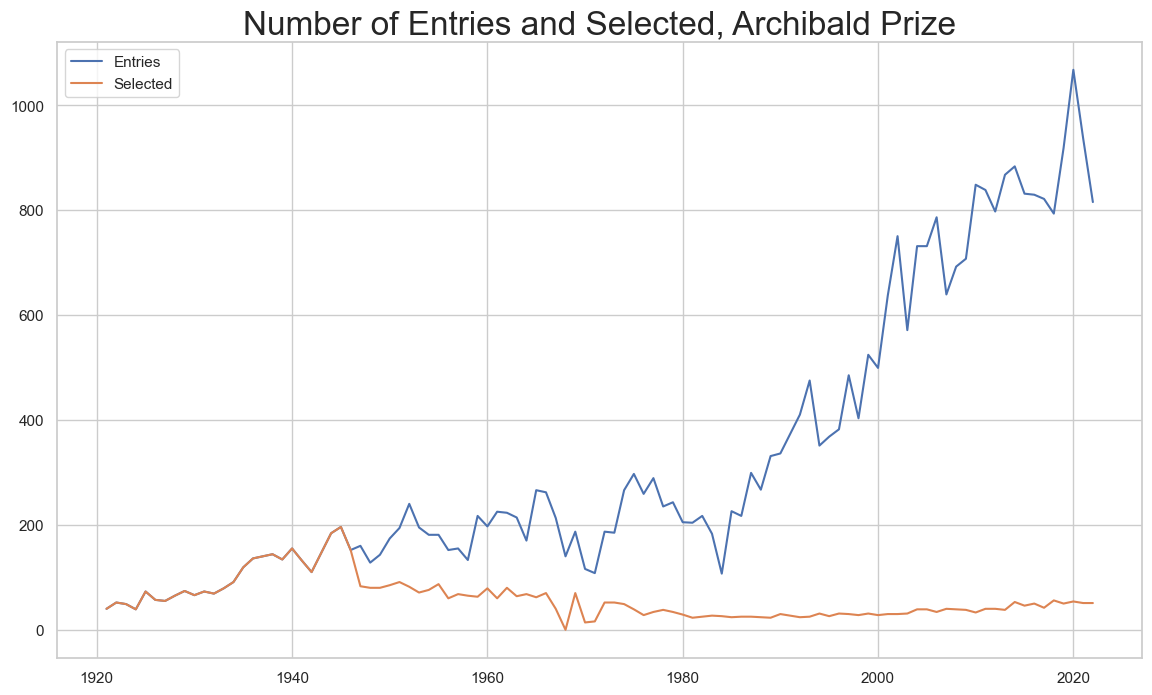

In [24]:
from IPython.display import Image
Image(filename='images/participationrates_python.png')

#### Prize Money

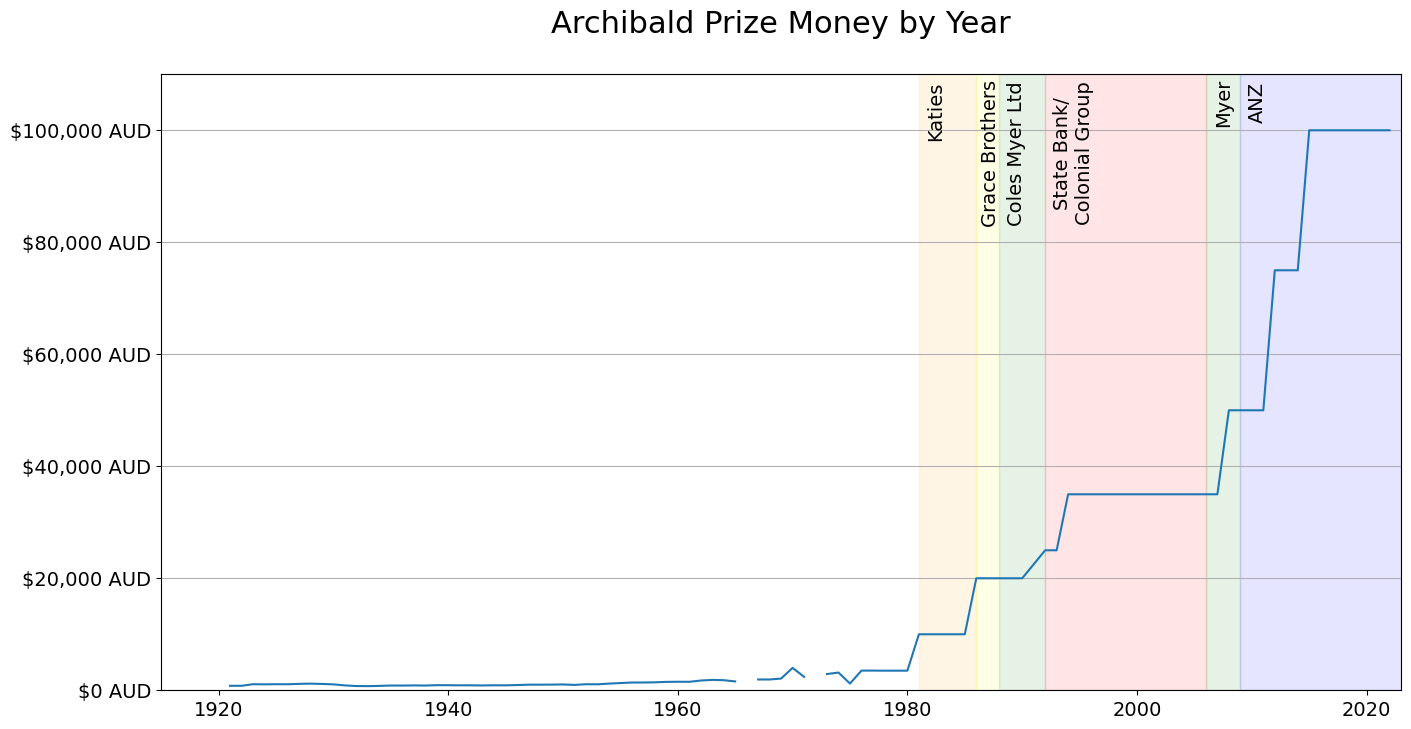

In [9]:
prize_money = pd.read_csv('data/Archibald_PrizeMoney2.csv', index_col=0)

plt.figure(figsize=(16, 8))

# Set the x-axis to the year column
x = prize_money.index

# Set the y-axis to the value column
y = prize_money['AUD_Equivalent']

# Create a line plot of the data
plt.plot(x, y)

# Add labels and a title
plt.xlabel('')
plt.title('Archibald Prize Money by Year\n', size=22)

plt.axvspan(1981, 1986, alpha=0.1, color='orange')
plt.text(1982.5, 103500, 'Katies', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1986, 1988, alpha=0.1, color='yellow')
plt.text(1987.25, 96000, 'Grace Brothers', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1988, 1992, alpha=0.1, color='green')
plt.text(1989.5, 96000, 'Coles Myer Ltd', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1992, 2006, alpha=0.1, color='red')
plt.text(1994.5, 96000, 'State Bank/\nColonial Group', ha='center', va='center',
         size=14, rotation=90)

plt.axvspan(2006, 2009, alpha=0.1, color='green')
plt.text(2007.5, 105000, 'Myer', ha='center', va='center',size=14,rotation=90)

plt.axvspan(2009, 2023, alpha=0.1, color='blue')
plt.text(2010.5, 105000, 'ANZ', ha='center', va='center',size=14,rotation=90)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(0,110000)
plt.xlim(1915,2023)

plt.grid(axis='y')

# Show the plot
plt.show()

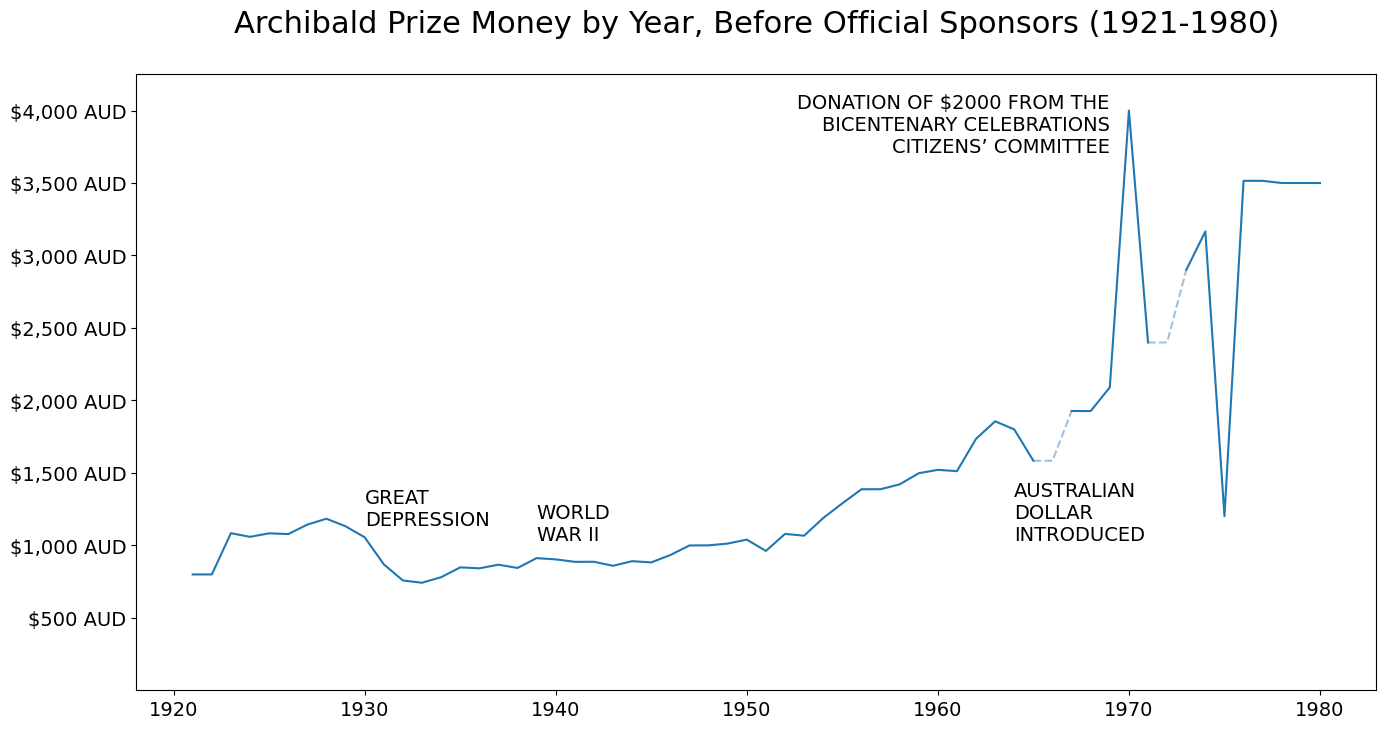

In [5]:
plt.figure(figsize=(16, 8))

missing_cond = (prize_money.index > 1964) & (prize_money.index < 1968)
missing_cond2 = (prize_money.index > 1970) & (prize_money.index < 1974)

# Set the x-axis to the year column
x = prize_money[prize_money.index < 1981].index
x2 = prize_money[missing_cond].index
x3 = prize_money[missing_cond2].index

# Set the y-axis to the value column
y = prize_money[prize_money.index < 1981]['AUD_Equivalent']
y2 = prize_money[missing_cond]['AUD_Equivalent'].ffill()
y3 = prize_money[missing_cond2]['AUD_Equivalent'].ffill()

# Create a line plot of the data
plt.plot(x, y)
plt.plot(x2, y2, linestyle='dashed',color='steelblue',alpha=0.5)
plt.plot(x3, y3, linestyle='dashed',color='steelblue',alpha=0.5)

# Add labels and a title
plt.xlabel('')
plt.title('Archibald Prize Money by Year, Before Official Sponsors (1921-1980)\n', size=22)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.text(1930, 1250, 'GREAT\nDEPRESSION', ha='left', va='center',size=14)
plt.text(1939, 1150, 'WORLD\nWAR II', ha='left', va='center',size=14)
plt.text(1964, 1225, 'AUSTRALIAN\nDOLLAR\nINTRODUCED', ha='left', va='center',size=14)
plt.text(1969, 3900, 'DONATION OF $2000 FROM THE\nBICENTENARY CELEBRATIONS\nCITIZENS’ COMMITTEE', ha='right', va='center',size=14)

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(1,4250)

# Show the plot
plt.show()

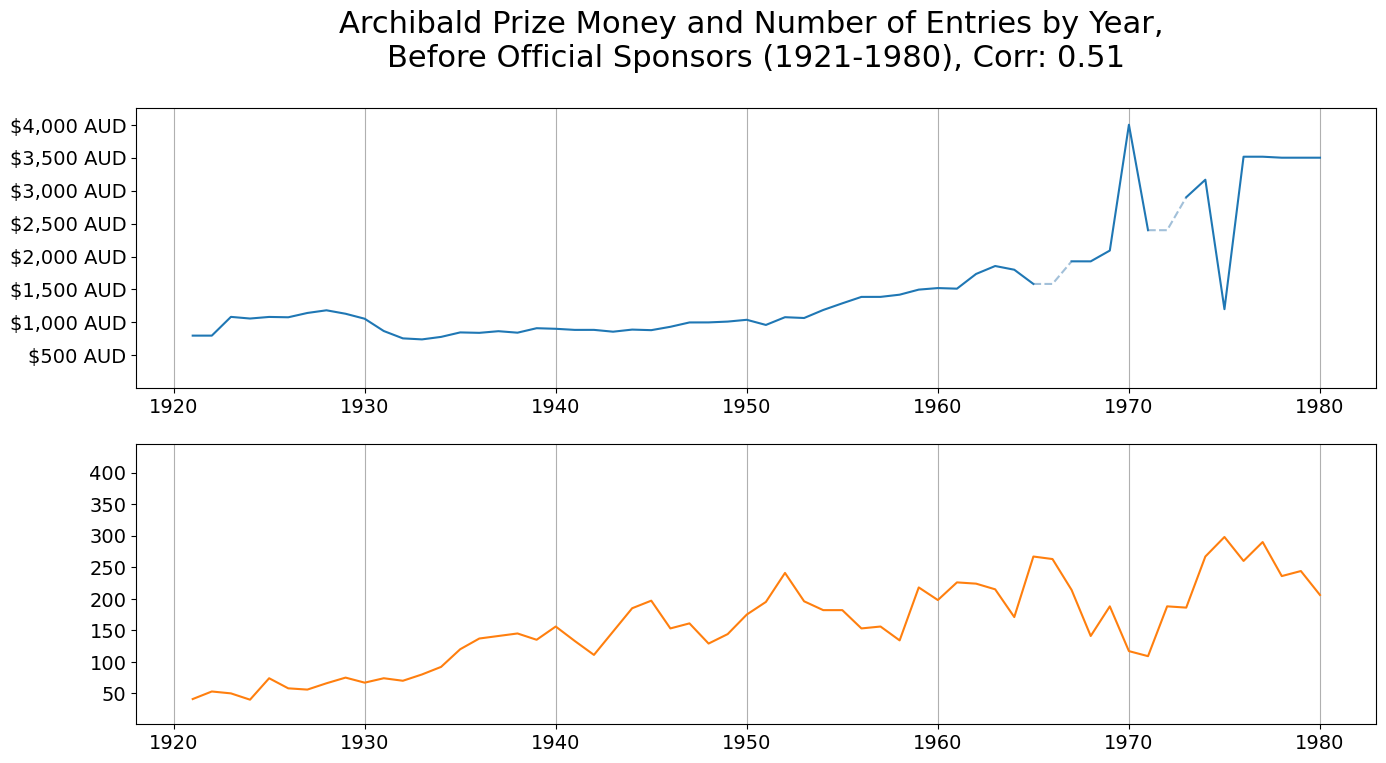

In [7]:
no_participants = pd.read_csv('data/no_participants_new.csv', index_col=0)

plt.figure(figsize=(16, 8))

missing_cond = (prize_money.index > 1964) & (prize_money.index < 1968)
missing_cond2 = (prize_money.index > 1970) & (prize_money.index < 1974)

# Set the x-axis to the year column
x = prize_money[prize_money.index < 1981].index
x2 = prize_money[missing_cond].index
x3 = prize_money[missing_cond2].index
x4 = no_participants[no_participants.Year < 1981]['Year']

# Set the y-axis to the value column
y = prize_money[prize_money.index < 1981]['AUD_Equivalent']
y2 = prize_money[missing_cond]['AUD_Equivalent'].ffill()
y3 = prize_money[missing_cond2]['AUD_Equivalent'].ffill()
y4 = no_participants[no_participants.Year < 1981]['Entries']

ax = plt.subplot(2, 1, 1)
# Create a line plot of the data
ax.plot(x, y)
ax.plot(x2, y2, linestyle='dashed',color='steelblue',alpha=0.5)
ax.plot(x3, y3, linestyle='dashed',color='steelblue',alpha=0.5)

beforesponsors = pd.merge(no_participants[no_participants.Year < 1981], 
                          prize_money[prize_money.index < 1981].reset_index())

cor = beforesponsors['Entries'].corr(beforesponsors['AUD_Equivalent']).round(2)

# Add labels and a title
plt.xlabel('')
plt.title(f'Archibald Prize Money and Number of Entries by Year, \nBefore Official Sponsors (1921-1980), Corr: {cor}\n', size=22)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)
plt.ylim(1,4250)
plt.grid(axis='x')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(x4, y4, color = 'tab:orange')

plt.yticks(size=14)
plt.xticks(size=14)
plt.ylim(1,445)
plt.grid(axis='x')

# Show the plot
plt.show()

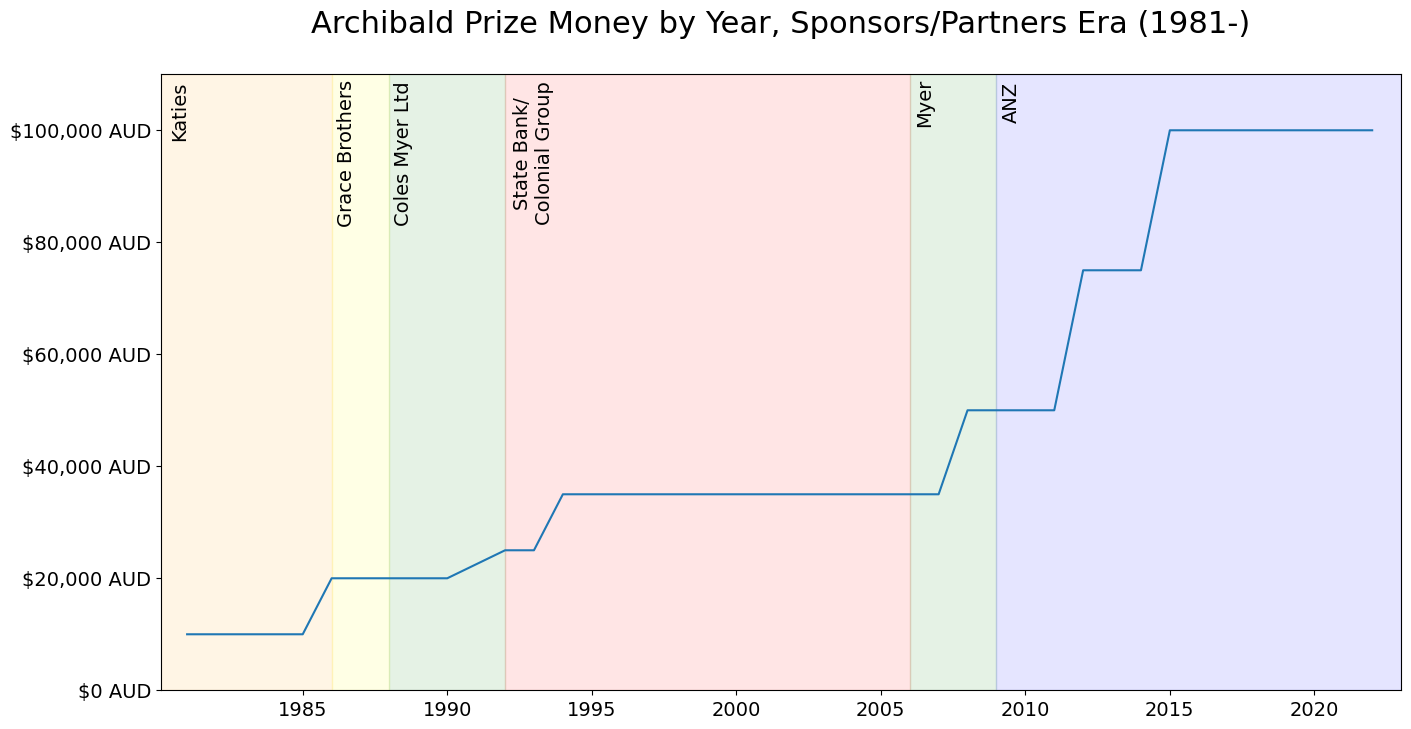

In [8]:
plt.figure(figsize=(16, 8))

# Set the x-axis to the year column
x = prize_money[prize_money.index >= 1981].index
# Set the y-axis to the value column
y = prize_money[prize_money.index >= 1981]['AUD_Equivalent']

# Create a line plot of the data
plt.plot(x, y)

# Add labels and a title
plt.xlabel('')
plt.title('Archibald Prize Money by Year, Sponsors/Partners Era (1981-)\n', size=22)

plt.axvspan(1980, 1986, alpha=0.1, color='orange')
plt.text(1980.75, 103500, 'Katies', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1986, 1988, alpha=0.1, color='yellow')
plt.text(1986.5, 96000, 'Grace Brothers', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1988, 1992, alpha=0.1, color='green')
plt.text(1988.5, 96000, 'Coles Myer Ltd', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1992, 2006, alpha=0.1, color='red')
plt.text(1993, 96000, 'State Bank/\nColonial Group', ha='center', va='center',
         size=14, rotation=90)

plt.axvspan(2006, 2009, alpha=0.1, color='green')
plt.text(2006.5, 105000, 'Myer', ha='center', va='center',size=14,rotation=90)

plt.axvspan(2009, 2023, alpha=0.1, color='blue')
plt.text(2009.5, 105000, 'ANZ', ha='center', va='center',size=14,rotation=90)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(0,110000)
plt.xlim(1980.1,2023)

# Show the plot
plt.show()

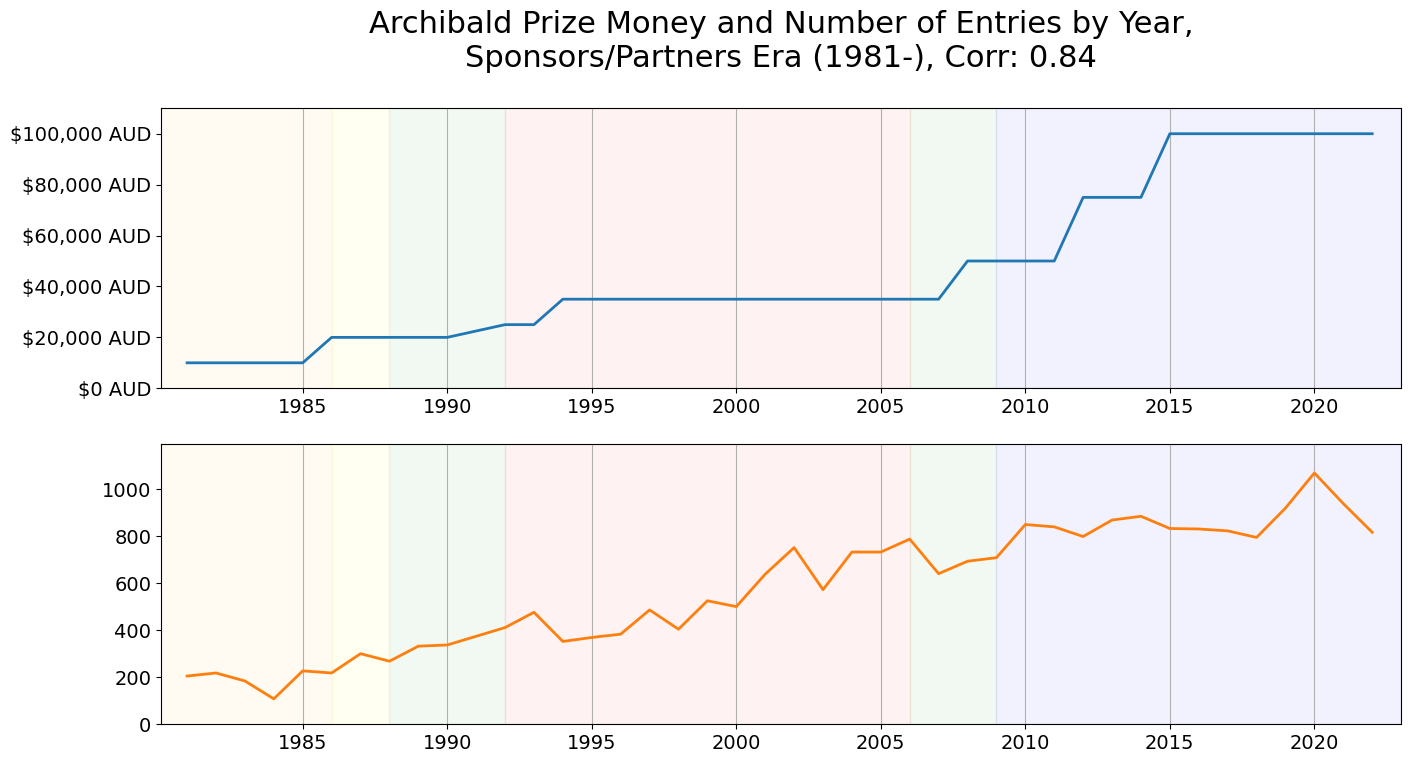

In [11]:
plt.figure(figsize=(16, 8))

# Set the x-axis to the year column
x = prize_money[prize_money.index >= 1981].index
x2 = no_participants[no_participants.Year >= 1981]['Year']

# Set the y-axis to the value column
y = prize_money[prize_money.index >= 1981]['AUD_Equivalent']
y2 = no_participants[no_participants.Year >= 1981]['Entries']


# Create a line plot of the data
ax = plt.subplot(2, 1, 1)
ax.plot(x, y, lw= 2)

plt.axvspan(1980, 1986, alpha=0.05, color='orange')
plt.axvspan(1986, 1988, alpha=0.05, color='yellow')
plt.axvspan(1988, 1992, alpha=0.05, color='green')
plt.axvspan(1992, 2006, alpha=0.05, color='red')
plt.axvspan(2006, 2009, alpha=0.05, color='green')
plt.axvspan(2009, 2023, alpha=0.05, color='blue')

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(0,110000)
plt.xlim(1980.1,2023)

beforesponsors = pd.merge(no_participants[no_participants.Year >= 1981], 
                          prize_money[prize_money.index >= 1981].reset_index())

cor = beforesponsors['Entries'].corr(beforesponsors['AUD_Equivalent']).round(2)

# Add labels and a title
plt.xlabel('')
plt.title(f'Archibald Prize Money and Number of Entries by Year,\nSponsors/Partners Era (1981-), Corr: {cor}\n', size=22)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)
plt.grid(axis='x')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(x2, y2, color = 'tab:orange', lw= 2)

plt.axvspan(1980, 1986, alpha=0.05, color='orange')
plt.axvspan(1986, 1988, alpha=0.05, color='yellow')
plt.axvspan(1988, 1992, alpha=0.05, color='green')
plt.axvspan(1992, 2006, alpha=0.05, color='red')
plt.axvspan(2006, 2009, alpha=0.05, color='green')
plt.axvspan(2009, 2023, alpha=0.05, color='blue')

plt.yticks(size=14)
plt.xticks(size=14)
plt.ylim(0,1190)
plt.grid(axis='x')

plt.xlim(1980.1,2023)

# Show the plot
plt.show()

#### Start Age

In [15]:
# Archibald start age
pd.DataFrame(artist_stats[1].describe()).T

count       mean        std   min   25%   50%   75%   max
1   62.0  38.032258  10.850652  19.0  31.0  35.0  45.0  64.0

#### End Age

In [16]:
# Archibald end age
pd.DataFrame(artist_stats[2].describe()).T

count       mean        std   min   25%   50%    75%   max
2   62.0  59.209677  12.787208  33.0  48.0  61.0  68.75  81.0

#### Participation duration

In [17]:
# Archibald overall participation duration
pd.DataFrame(artist_stats['diff'].describe()).T

count       mean        std  min   25%   50%    75%   max
diff   62.0  21.177419  14.801998  3.0  11.0  16.5  31.75  62.0

#### Archibald Prize participation trajectory

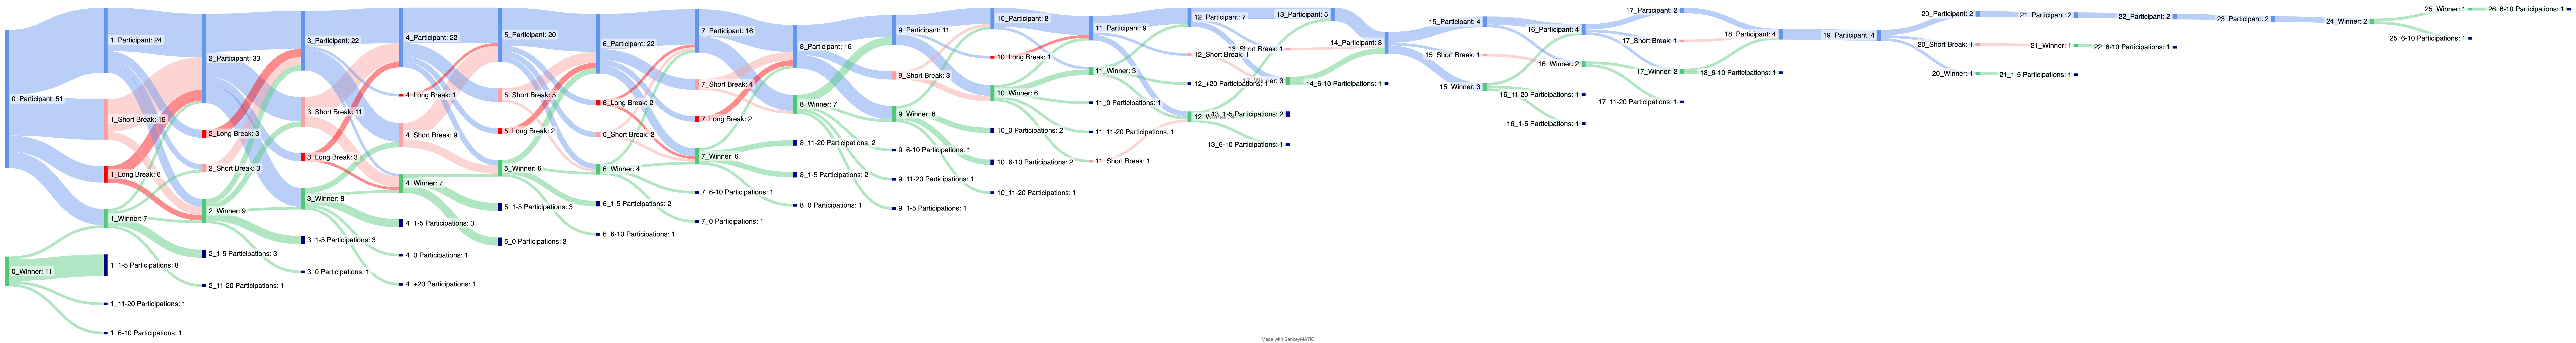

In [12]:
from IPython.display import Image
Image(filename='images/test_sankey.png')

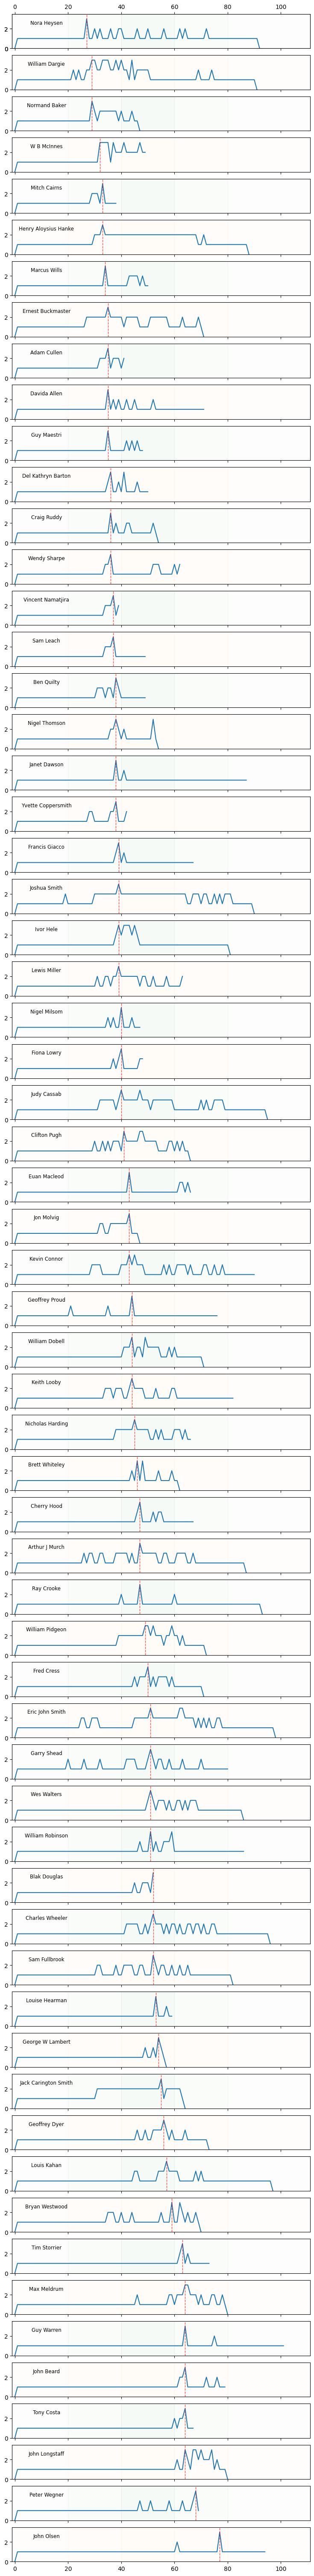

In [18]:
tt = artist_df.T

fig, axes = plt.subplots(tt.shape[1], 1, 
                         figsize=(9, tt.shape[1]*1.25), 
                         sharex=True)

# plot each col onto one ax
for idx,(col, ax) in enumerate(zip(tt.columns, axes.flat)):
    colour = 'green'
    
    if idx == 0: ax = ax.twiny()
    if idx % 2: colour = 'orange'
    
    tt[col].plot(ax=ax, rot=0)

    ttt = pd.DataFrame(tt[col])
    markthis = ttt[ttt[col] == 3].index[0]
    
    ax.axvline(markthis, color='r', linestyle='--', lw=1, alpha=0.7)
    ax.set_title(col,x=0.115, y=0.6, size=8.5)
    ax.set_ylim(0,3.5)
    ax.set_xlim(-1,111)
    ax.axvspan(-1, 20, alpha=0.01, color=colour)
    ax.axvspan(20, 40, alpha=0.025, color=colour)
    ax.axvspan(40, 60, alpha=0.035, color=colour)
    ax.axvspan(60, 80, alpha=0.025, color=colour)
    ax.axvspan(80, 111, alpha=0.01, color=colour)

#### Who is in the portrait?

<Figure size 800x600 with 0 Axes>

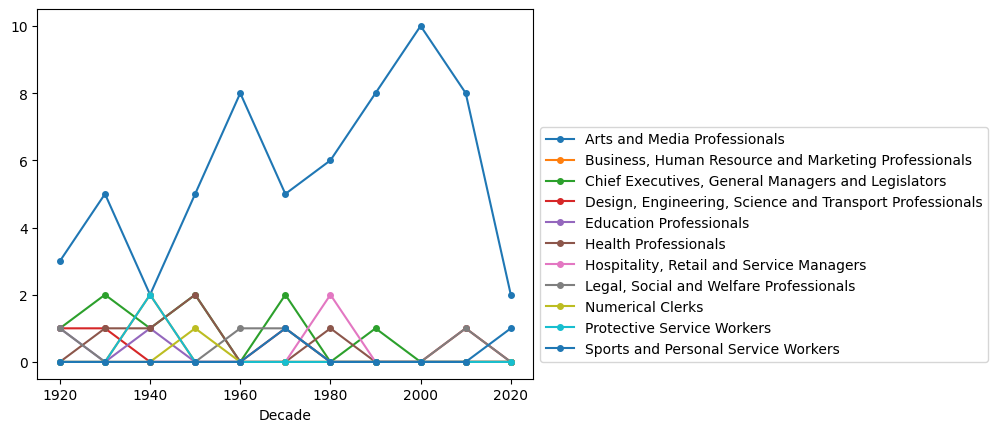

In [20]:
from matplotlib.pyplot import figure
archies['Decade'] = [ int(np.floor(int(year)/10) * 10) 
                       for year in np.array(archies["YEAR"])]

t1 = pd.crosstab(archies['Decade'],archies['ANZSCO_1'])

figure(figsize=(8, 6))
t1.plot(marker="o", markersize=4)
plt.legend(ncol=1, bbox_to_anchor=(1, 0.7))
plt.show()

<Figure size 800x600 with 0 Axes>

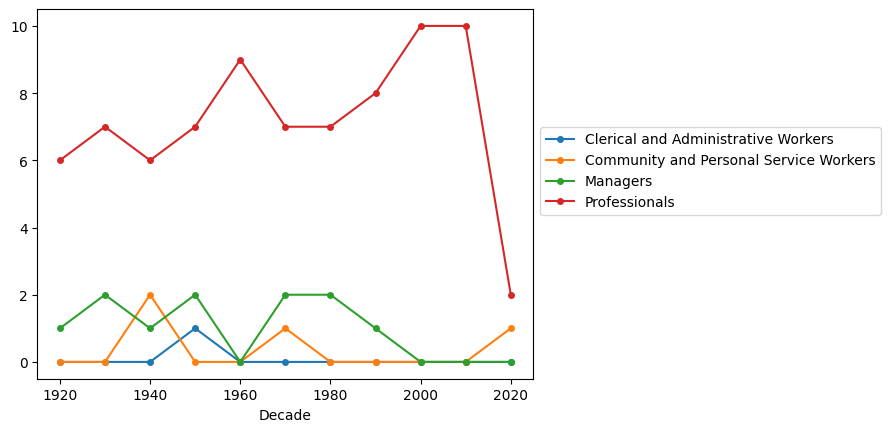

In [21]:
from matplotlib.pyplot import figure

t2 = pd.crosstab(archies['Decade'],archies['ANZSCO_2'])

figure(figsize=(8, 6))
t2.plot(marker="o", markersize=4)
plt.legend(ncol=1, bbox_to_anchor=(1, 0.7))
plt.show()

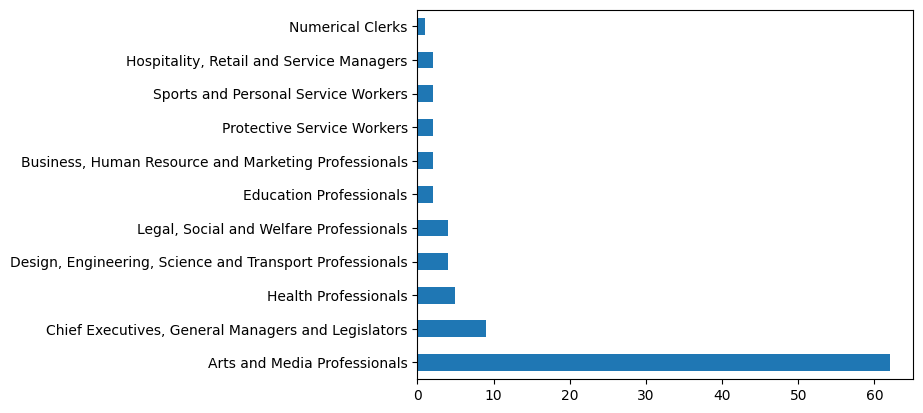

In [22]:
archies['ANZSCO_1'].value_counts().plot(kind='barh')
plt.show()

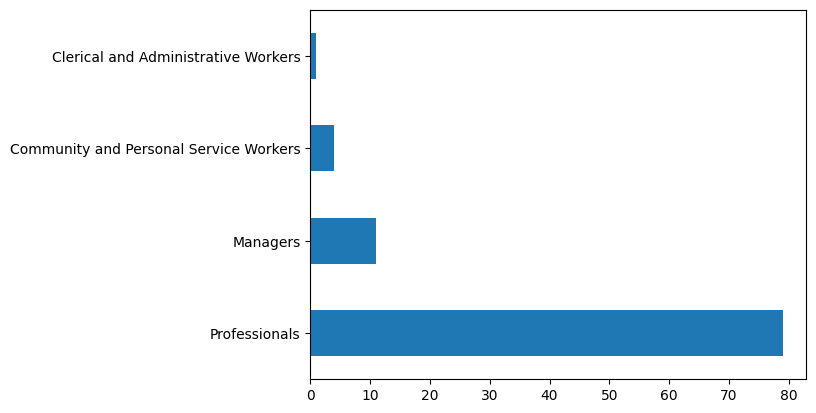

In [23]:
archies['ANZSCO_2'].value_counts().plot(kind='barh')
plt.show()